In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [30]:
# arms
k = 10
# generate action values
q_star = np.random.normal(0, 1, k)

In [31]:
# initialize estimated action values and num of times action taken
def init_vals():
    Q = []
    N = []
    for i in range(k):
        Q.append(0)
        N.append(0)
    return Q, N

In [32]:
# reward for an action
def bandit(action):
    return np.random.normal(q_star[action], 1)

In [33]:
# runs a bandit problem
# returns action values and % of time optimal action picked
def sample_avg(iterations, epsilon):
    Q, N = init_vals()
    optimal = np.argmax(q_star)
    optimal_ct = 0
    total_reward = 0
    for i in range(iterations):
        # choose to explore or exploit
        rand = np.random.rand()
        if rand < (1 - epsilon):
            action = np.argmax(Q)
        else:
            action = int(np.floor(np.random.rand() * 10))
        reward = bandit(action)
        total_reward += reward
        N[action] = N[action] + 1
        Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
        if action == optimal:
            optimal_ct += 1
    return Q, (optimal_ct / iterations), (total_reward / iterations)

In [34]:
# generate optimal action %s for iterations up to 2000
steps = []
opt_pct = []
avg_reward = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.1)
    steps.append(i)
    opt_pct.append(opt)
    avg_reward.append(reward)

In [35]:
opt_pct_1 = []
avg_reward_1 = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.01)
    opt_pct_1.append(opt)
    avg_reward_1.append(reward)

In [36]:
opt_pct_2 = []
avg_reward_2 = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.0)
    opt_pct_2.append(opt)
    avg_reward_2.append(reward)

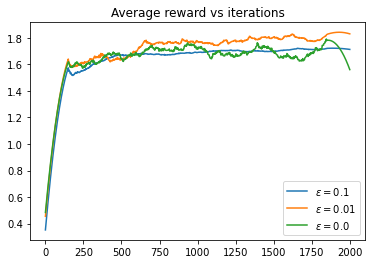

In [49]:
# _,opt = sample_avg(1000, 0)
# opt
avg_reward_smooth = savgol_filter(avg_reward, 301, 2)
avg_reward_1_smooth = savgol_filter(avg_reward_1, 301, 2)
avg_reward_2_smooth = savgol_filter(avg_reward_2, 301, 2)

plt.plot(steps, avg_reward_smooth, label=r'$\epsilon = 0.1$')
plt.plot(steps, avg_reward_1_smooth, label=r'$\epsilon = 0.01$')
plt.plot(steps, avg_reward_2_smooth, label=r'$\epsilon = 0.0$')
plt.title('Average reward vs iterations')
plt.legend()

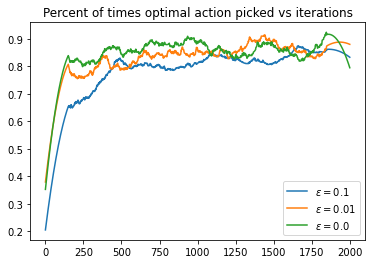

In [48]:
opt_pct_smooth = savgol_filter(opt_pct, 301, 2)
opt_pct_1_smooth = savgol_filter(opt_pct_1, 301, 2)
opt_pct_2_smooth = savgol_filter(opt_pct_2, 301, 2)

plt.plot(steps, opt_pct_smooth, label=r'$\epsilon = 0.1$')
plt.plot(steps, opt_pct_1_smooth, label=r'$\epsilon = 0.01$')
plt.plot(steps, opt_pct_2_smooth, label=r'$\epsilon = 0.0$')
plt.title('Percent of times optimal action picked vs iterations')
plt.legend()
